In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df=pd.read_csv('gtex_hoap_Tissues_medianTPM.tsv',sep='\t')
logdf = df.apply(lambda x: np.log(x+1) if np.issubdtype(x.dtype, np.number) else x)

Corr: 0.9710898516939537


Text(0.0, 9.95, 'Adipose_Subcutaneous      Pearson corr: 0.97')

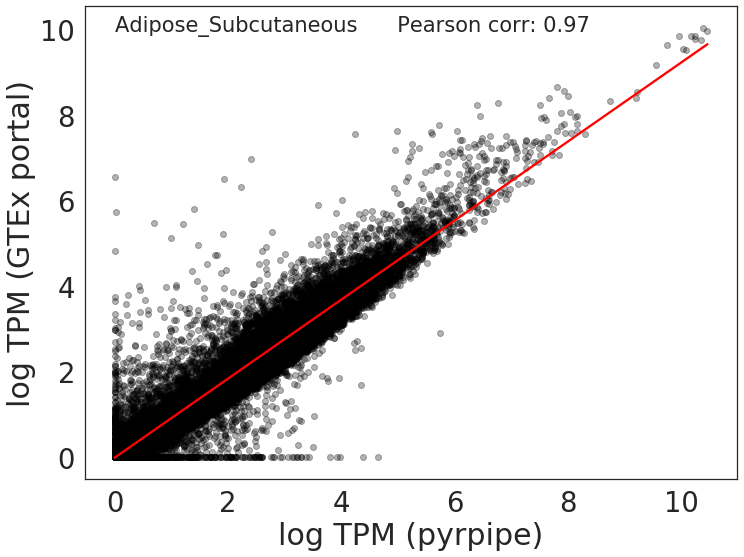

In [36]:
#fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11.7,8.7))

#tissue="Adipose_Visceral_Omentum"
#t2="hoap_"+tissue
#name="Adipose-Visceral (Omentum)"

tissue="Adipose_Subcutaneous"
t2="hoap_"+tissue
name="Adipose-Subcutaneous"

r=logdf[tissue].corr(logdf[t2])
print('Corr:',r)

sns.set(font_scale=2.5,style="white",rc={'figure.figsize':(11.7,8.7)})
g=sns.regplot(x=tissue, 
            y=t2, 
            data=logdf,
            scatter_kws={"color": "black",'alpha':0.3}, 
            line_kws={"color": "red"})

g.set(xlabel='log TPM (pyrpipe)', ylabel='log TPM (GTEx portal)')
g.text(0.0, 9.95,'{}      Pearson corr: {}'.format(tissue,round(r, 2), nsmall = 2), fontsize=21)



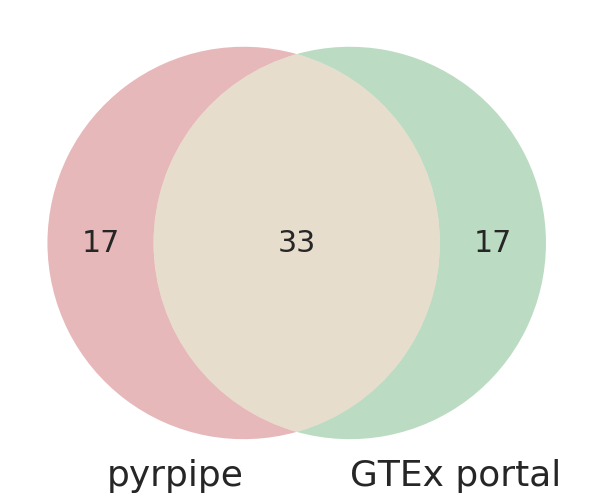

In [16]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
#get top genes
set_pyrpipe=set(logdf.sort_values(by=t2, ascending=False)[['Description']].head(50)['Description'])

set_gtex=set(logdf.sort_values(by=tissue, ascending=False)[['Description']].head(50)['Description'])

#print(set_pyrpipe)

venn2([set_pyrpipe, set_gtex], ('pyrpipe', 'GTEx portal'))
plt.show()

#print(set_pyrpipe.intersection(set_gtex))
#print(set_gtex)
#print(set_pyrpipe)
